<a href="https://colab.research.google.com/github/paolo0o0/Sber-Digital-Teams/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Кластеризация


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## K-средних

Напомним что сам алгоритм можно схематически представить в виде следующих шагов:

1. Инициализируем центры кластеров случайно (должно быть задано количество кластеров).
2. Относим точки к соответствующим кластерам (с минимальным расстоянием до их центра).
3. Производится пересчет центров кластеров по формуле центра масс всех точек принадлежащих кластеру.
4. Пункты 2-3 повторяются до тех пор пока центры кластеров перестанут меняться (сильно).

Сгенерируем три случайных непересекающихся кластера из нормального распределения с центром в разных точках.

In [16]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=3, random_state=42)


Применим KMeans с числом кластеров 3

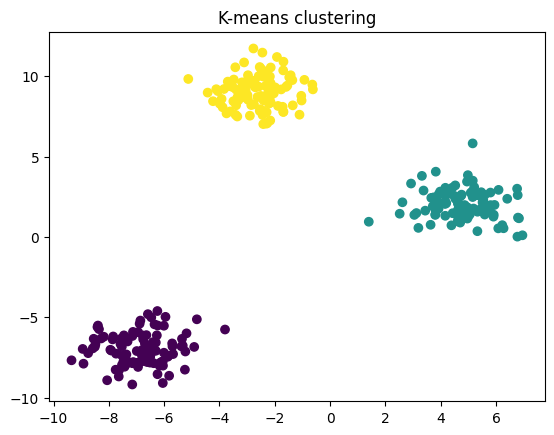

In [17]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3)
k_means = k_means.fit(X)
clusters = k_means.predict(X)
plt.scatter(X[:,0], X[:,1], c=clusters)
plt.title('K-means clustering')
plt.show()

Посмотрим, что будет происходить, если мы не угадали с числом кластеров.

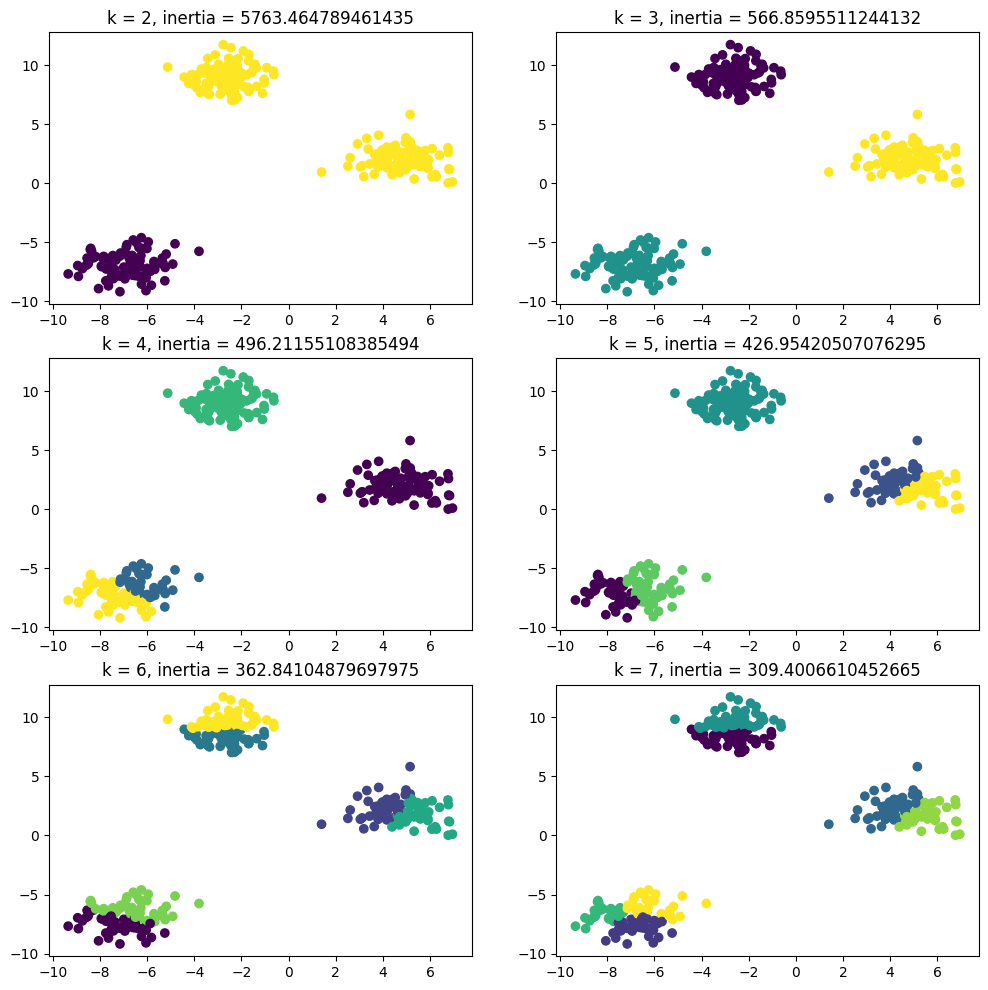

In [18]:
inertia_values = []
k_values = []

plt.figure(figsize=(12, 12))
for k in range(2, 8):
    k_means = KMeans(n_clusters=k)
    k_means = k_means.fit(X)
    clusters = k_means.predict(X)
    plt.subplot(3, 2, k - 1)  # рисуем
    plt.scatter(X[:,0], X[:,1], c=clusters)  # рисуем
    plt.title('k = {}, inertia = {}'.format(k, k_means.inertia_))
    inertia_values.append(k_means.inertia_)
    k_values.append(k)
plt.show()

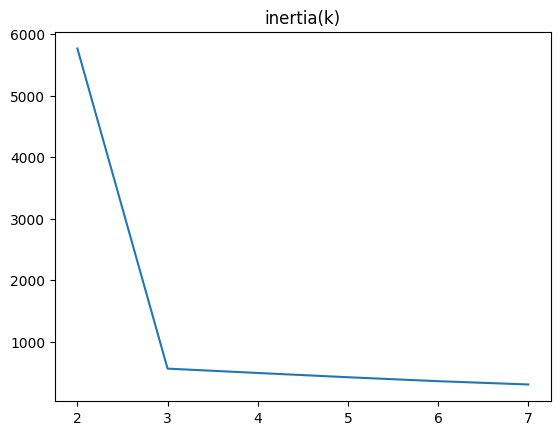

In [19]:
# правило "локтя"
plt.plot(k_values, inertia_values)
plt.title('inertia(k)')
plt.show()

Как мы видим, k-means обязательно пытается отдать каждому кластеру какие-то объекты и, как большинство алгоритмов кластеризации зависит от заданного числа кластеров.

Один из главных недостатков k-means является случайная инициализация центров кластеров, что может привести к различным результатам кластеризации.

Главным же достоинством является скорость алгоритма. На каждой итерации требуется пересчет только расстояний до центров кластеров.

#### Задание 1

Сколько кластеров в этих данных (переберите от 2 до 9)? Используйте KMeans.


In [20]:
from sklearn.datasets import load_iris
X = load_iris()['data']
X.shape

(150, 4)

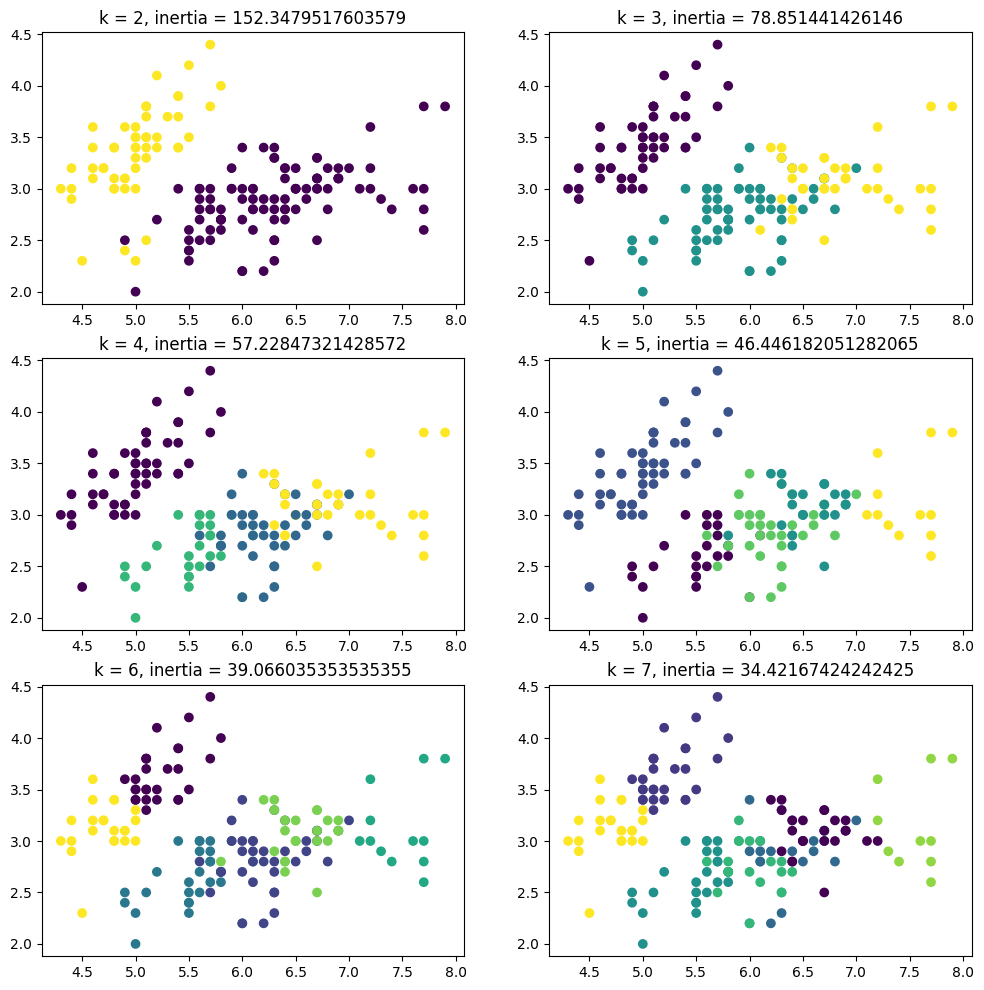

In [21]:
# тут ваш код (используйте куски выше)
inertia_values = []
k_values = []

plt.figure(figsize=(12, 12))
for k in range(2, 8):
    k_means = KMeans(n_clusters=k)
    k_means = k_means.fit(X)
    clusters = k_means.predict(X)
    plt.subplot(3, 2, k - 1)  # рисуем
    plt.scatter(X[:,0], X[:,1], c=clusters)  # рисуем
    plt.title('k = {}, inertia = {}'.format(k, k_means.inertia_))
    inertia_values.append(k_means.inertia_)
    k_values.append(k)
plt.show()

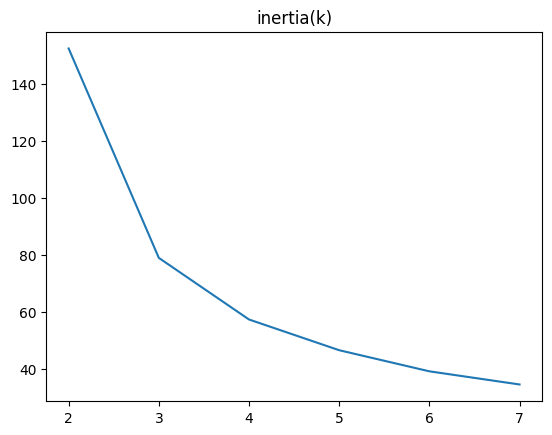

In [14]:
plt.plot(k_values, inertia_values)
plt.title('inertia(k)')
plt.show()

## DBSCAN

Это алгоритм, основанный на плотности — если дан набор объектов в некотором пространстве, алгоритм группирует вместе объекты, которые расположены близко и помечает как выбросы объекты, которые находятся в областях с малой плотностью (ближайшие соседи которых лежат далеко).

посмотрим на результаты кластеризации при разном выборе параметра eps и min_samples

In [31]:
X, y = make_blobs(n_samples=300, centers=3, random_state=42)

- Что значат маленькие точки на графике?
- Какие выводы можно сделать по графикам?

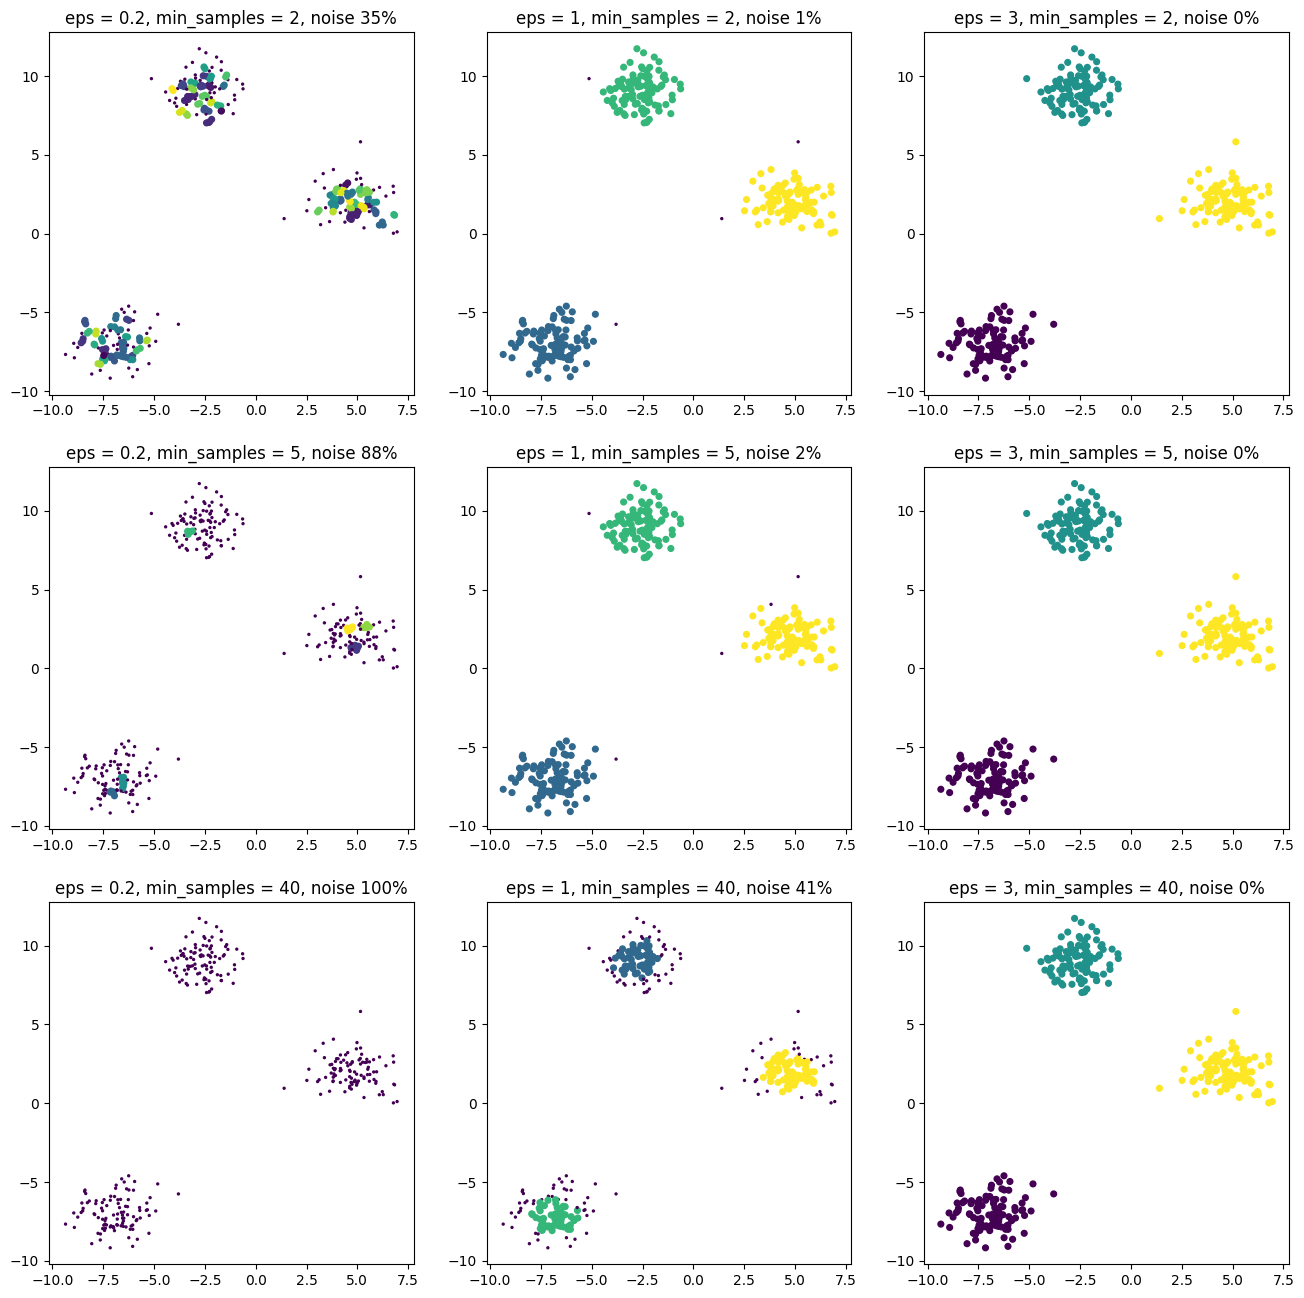

In [32]:
from sklearn.cluster import DBSCAN

plt.figure(figsize=(16, 16))
i = 1
for min_samples in [2, 5, 40]:
    for eps in [0.2, 1, 3]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X)
        plt.subplot(3, 3, i)
        plt.scatter(X[:,0], X[:,1], c=clusters, s=15 * (clusters != -1) + 2)
        plt.title('eps = {}, min_samples = {}, noise {:.0f}%'.format(
            eps, min_samples, 100. * np.sum(clusters == -1) / len(X)))
        i += 1
plt.show()

Посмотрим как отработают алгоритмы кластеризации KMeans и DBSCAN при другой форме кластеров

#### Задание 2

Подберите параметры DBSCAN для идеальной кластеризации.

In [35]:
from sklearn.datasets import make_circles
X = make_circles(n_samples=1500, factor=0.5, noise=.05)[0]
X.shape

(1500, 2)

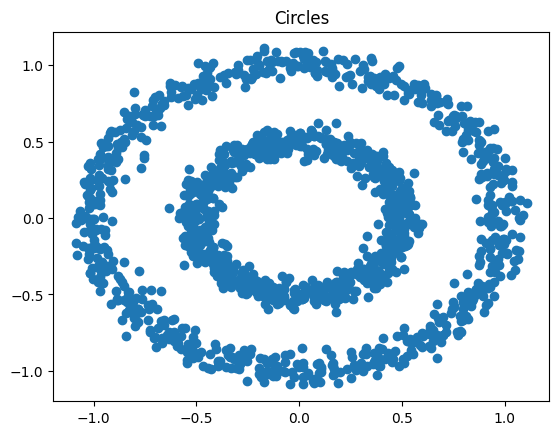

In [36]:
plt.scatter(X[:,0], X[:,1])
plt.title('Circles')
plt.show()

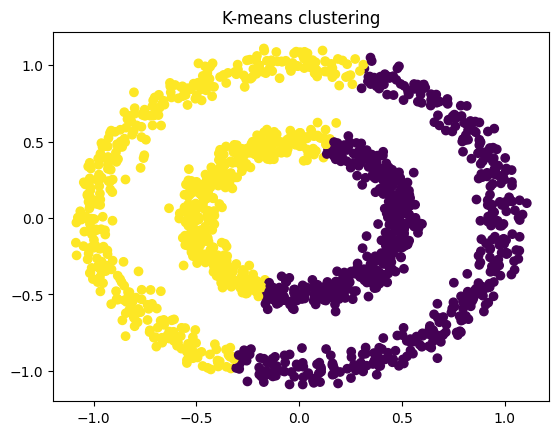

In [37]:
# kmeans не справится
k_means = KMeans(n_clusters = 2)
k_means = k_means.fit(X)
clusters = k_means.predict(X)
plt.scatter(X[:,0], X[:,1], c = clusters)
plt.title('K-means clustering')
plt.show()

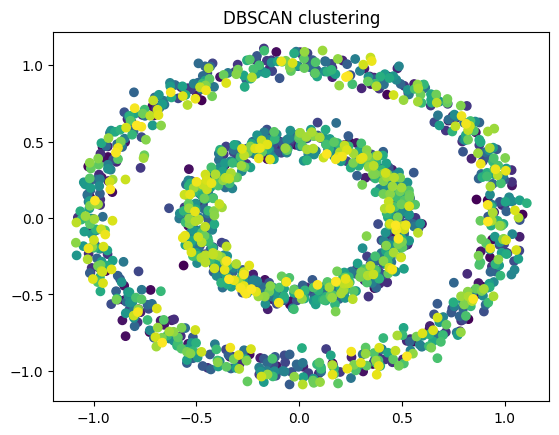

In [45]:
dbscan = DBSCAN(eps=0.000001, min_samples=1) # параметры менять здесь
clusters = dbscan.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = clusters)
plt.title('DBSCAN clustering')
plt.show()

Видно, что DBSCAN хорошо справился с задачей при верном выборе гиперпараметров `eps` и `min_samples`.
KMeans попытался выделить выпуклые области для каждого кластера, и в данном случае не смог выделить кластеры более сложной формы.

## Данные посложнее - рукописные цифры от 0 до 9.

Рассмотрим данные образцов рукописного написания цифр

In [46]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits['data'], digits['target']

#### Задание 3
- Сколько картинок содержится в Х?
- Какого размера картинки?
- Как изображения хранятся в компьютере?

In [51]:
# Ваш код здесь
X.shape[:][0], int(np.sqrt(X.shape[:][1]))

(1797, 8)

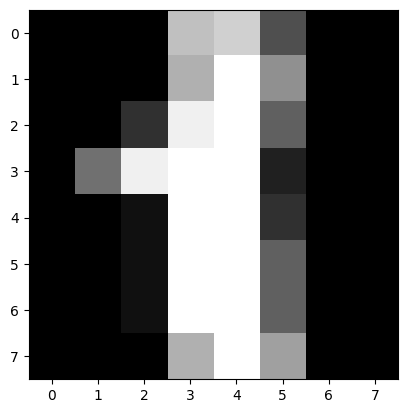

In [52]:
plt.imshow(X[1].reshape(8, 8), cmap='gray');

Кластеризуем изображения цифр. В данной задаче мы знаем число кластеров, которые хотим получить.

#### Задание 4
Воспользуйтесь алгоритмом KMeans

In [58]:
### Ваш код здесь
k_means = KMeans(n_clusters = 10)
clusters = k_means.fit(X).predict(X)
clusters

array([1, 5, 5, ..., 5, 6, 6], dtype=int32)

- Как проверить качество кластеризации?

Для данных знаем целевое значение, поэтому можем проверить качество кластеризации, как долю правильных ответов.

Номера кластеров, которые были предсказаны алгоритмом, не имеют ничего общего с настоящими цифрами.

Посмотрим, какая цифра представлена больше всего в кластере. Будем считать, что тогда это кластер, соответствующий этой цифре.

То есть будем считать, что кластер относится к целевому значению $k$, если большинство объектов кластера имеют целевое значение $k$.

In [59]:
# можно расскоментировать код для лучшего понимания
pred = np.zeros(X.shape[0])
print(X.shape[0])
for i in range(10):
    # print(i)
    bc = np.bincount(y[clusters == i])
    print(bc)
    print(bc.argmax())
    pred[clusters == i] = bc.argmax()
    print('---')

1797
[  0   1   0   2   0 136   0   5   6   7]
5
---
[177   0   1   0   0   0   1]
0
---
[  1   0   0   0 164   2]
4
---
[ 0 55  2  0  5  0  1  2  6 20]
1
---
[  0   0   3   7  10   0   0 170   3   8]
7
---
[  0  99   8   7   2   0   2   2 100]
8
---
[  0   0   2   9   0  42   0   0  51 139]
9
---
[  0   2   0   0   0   1 177   0   2]
6
---
[  0  24 148   1   0   0   0   0   3]
2
---
[  0   1  13 157   0   1   0   0   3   6]
3
---


In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y, pred)

0.7918753478018921

Найдем объекты, которые по ошибке попали в этот класс.

In [65]:
incorect_indices = np.where(np.logical_and(pred == 4, y != 4))[0]
incorect_indices

array([ 678, 1573, 1692])

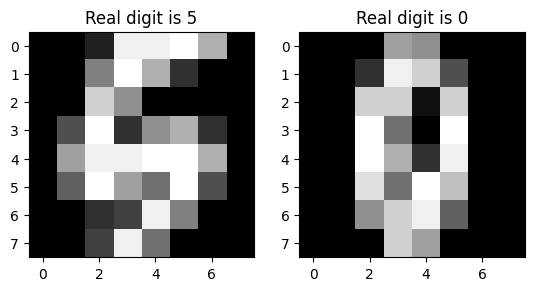

In [66]:
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(X[incorect_indices[i]].reshape(8, 8), cmap='gray')
    plt.title("Real digit is {}".format(y[incorect_indices[i]]))

#### Задание 5
Посмотрим на настоящие цифры.

In [68]:
corect_indices = np.where(np.logical_and(pred == 4, y == 4))[0] # Ваш код здесь
corect_indices

array([   4,   14,   24,   41,   64,   68,   87,   97,  100,  110,  111,
        121,  124,  134,  144,  154,  171,  194,  225,  228,  239,  250,
        260,  270,  280,  297,  320,  324,  343,  353,  356,  366,  367,
        377,  380,  390,  400,  410,  427,  450,  454,  483,  486,  497,
        507,  510,  520,  540,  557,  580,  584,  603,  613,  616,  626,
        627,  650,  660,  687,  710,  714,  733,  743,  756,  767,  780,
        790,  800,  817,  840,  844,  863,  873,  876,  886,  887,  897,
        900,  909,  919,  929,  946,  966,  970,  988,  998, 1001, 1011,
       1012, 1022, 1023, 1033, 1043, 1053, 1070, 1091, 1114, 1124, 1127,
       1137, 1138, 1148, 1151, 1161, 1171, 1181, 1198, 1221, 1225, 1244,
       1254, 1257, 1267, 1268, 1278, 1281, 1291, 1301, 1311, 1328, 1351,
       1355, 1374, 1384, 1387, 1397, 1398, 1408, 1411, 1419, 1429, 1439,
       1456, 1479, 1483, 1502, 1512, 1515, 1525, 1526, 1536, 1539, 1549,
       1559, 1567, 1584, 1607, 1638, 1641, 1651, 16

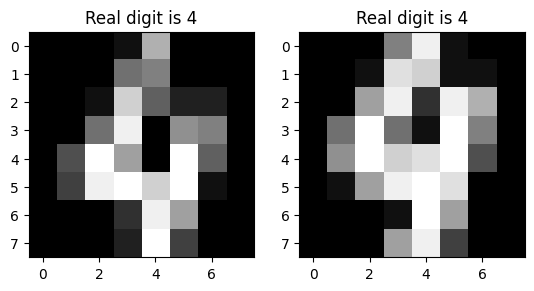

In [69]:
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.imshow(X[corect_indices[i]].reshape(8, 8), cmap='gray')
    plt.title("Real digit is {}".format(y[corect_indices[i]]))

- Какой размерности картинки? (Сколько нужно чисел, чтобы описать каждую картинку?)
- Как отобразить все картинки на одной плоскости?

## PCA

In [70]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits['data'], digits['target']

Как известно из лекций, PCA позволяет снизить размерность признакового пространства, потеряв наименьшее количество информации.

Применим метод главных компонент к данным образцов рукописного написания цифр Digits.

Выберем гиперпараметр n_components=2 и визуализируем результат

In [71]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
digits_2d = pca.fit_transform(X)
digits_2d.shape

(1797, 2)

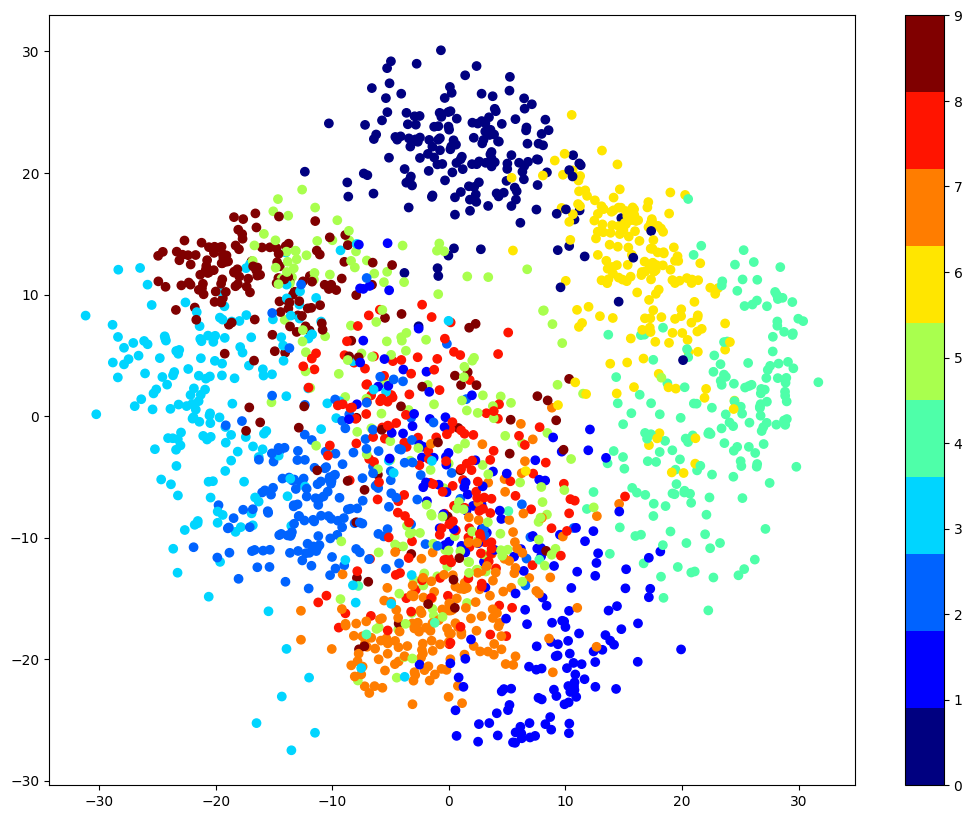

In [72]:
plt.figure(figsize=(13,10))
cmap = plt.get_cmap('jet', 10)
plt.scatter(digits_2d[:, 0], digits_2d[:, 1], c = y, cmap=cmap)
plt.colorbar()
plt.show()

- Видно, что изображения одной цифры часто располагаются ближе друг к другу.
- Обособленно выделяются только нули, остальные цифры смешиваются. **Можем ли мы разделить цифры лучше?**

## Бонус: t-SNE

In [73]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits['data'], digits['target']

In [76]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30)
digits_2d = tsne.fit_transform(X)

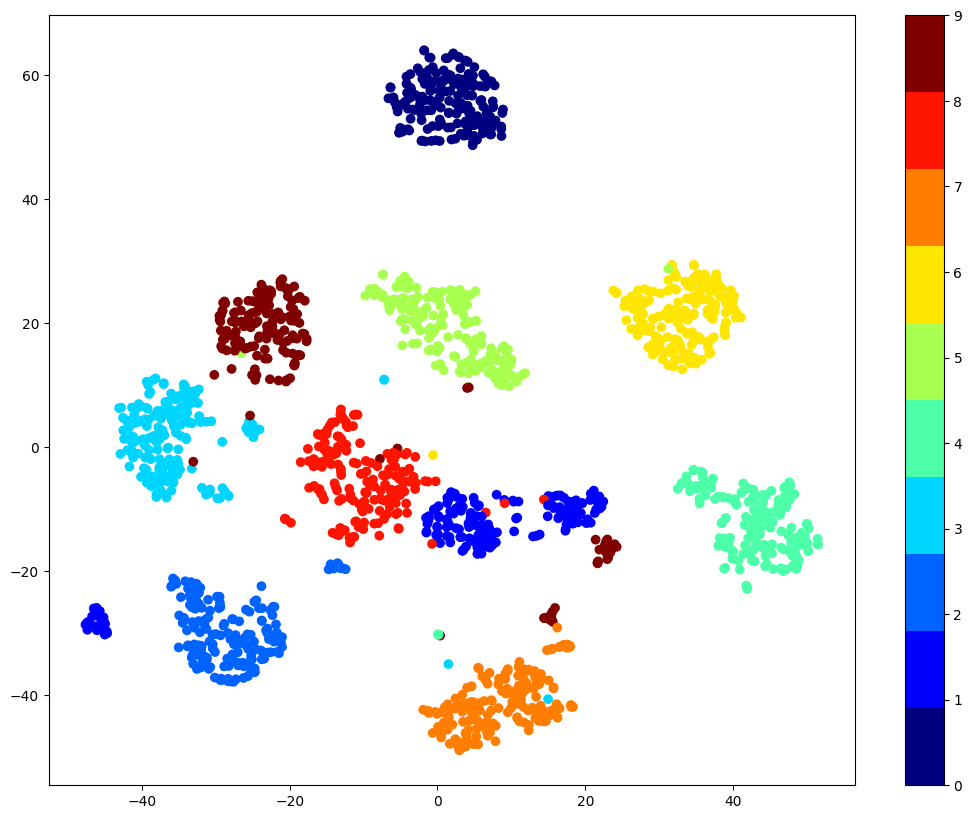

In [77]:
plt.figure(figsize=(13,10))
cmap = plt.get_cmap('jet', 10)
plt.scatter(digits_2d[:, 0], digits_2d[:, 1], c = y, cmap=cmap)
plt.colorbar()
plt.show()

### Задание 6

Сколько тут кластеров?

Попробуйте PCA и t-SNE.


--2023-11-15 23:41:37--  https://www.dropbox.com/s/n4vwlwe395rrwwe/dim032.txt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/n4vwlwe395rrwwe/dim032.txt [following]
--2023-11-15 23:41:37--  https://www.dropbox.com/s/dl/n4vwlwe395rrwwe/dim032.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3d6067cbc31442c6b4f180d9ad.dl.dropboxusercontent.com/cd/0/get/CHm4qFbURXic5nHeejj_s6Z_Ii6i03og-hZxVCAjFrPCarsvDddRMMWliCA156XzXPYHE19Bzf2RN1BfuYRFCKA2UtZXFQG0rHwjgwgSL9LGci8IfpwA1dieE_98ce2pM9X4AhwVmaL1-QKyXVwmFro3/file?dl=1# [following]
--2023-11-15 23:41:37--  https://uc3d6067cbc31442c6b4f180d9ad.dl.dropboxusercontent.com/cd/0/get/CHm4qFbURXic5nHeejj_s6Z_Ii6i03og-hZxVCAjFrPCarsvDddRMMWliCA156XzXPYHE19Bzf2RN1BfuYRFCKA2UtZXFQG0rHwjgwgSL9

<ipython-input-87-4134d0fe8454>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  X = pd.read_csv("dim032.txt", sep='   ', header=None).values.reshape(-1, 32)


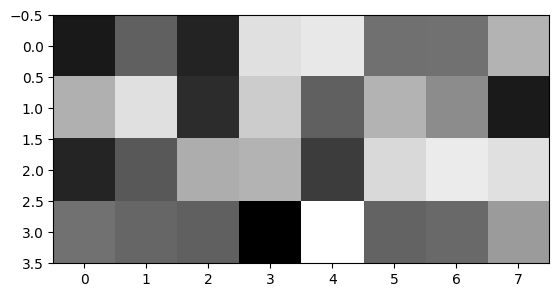

In [87]:
import pandas as pd
# скачиваем данные
# http://cs.joensuu.fi/sipu/datasets/dim032.txt
! wget https://www.dropbox.com/s/n4vwlwe395rrwwe/dim032.txt?dl=1 -O dim032.txt
X = pd.read_csv("dim032.txt", sep='   ', header=None).values.reshape(-1, 32)

plt.imshow(X[100].reshape(4, 8), cmap='gray')

In [79]:
# тут ваш код (обучите t-SNE)
tsne = TSNE(n_components = 2, perplexity=50)
data_2d = tsne.fit_transform(X)

<ipython-input-81-f2ad79ad2426>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_2d[:, 0], data_2d[:, 1], cmap=cmap)


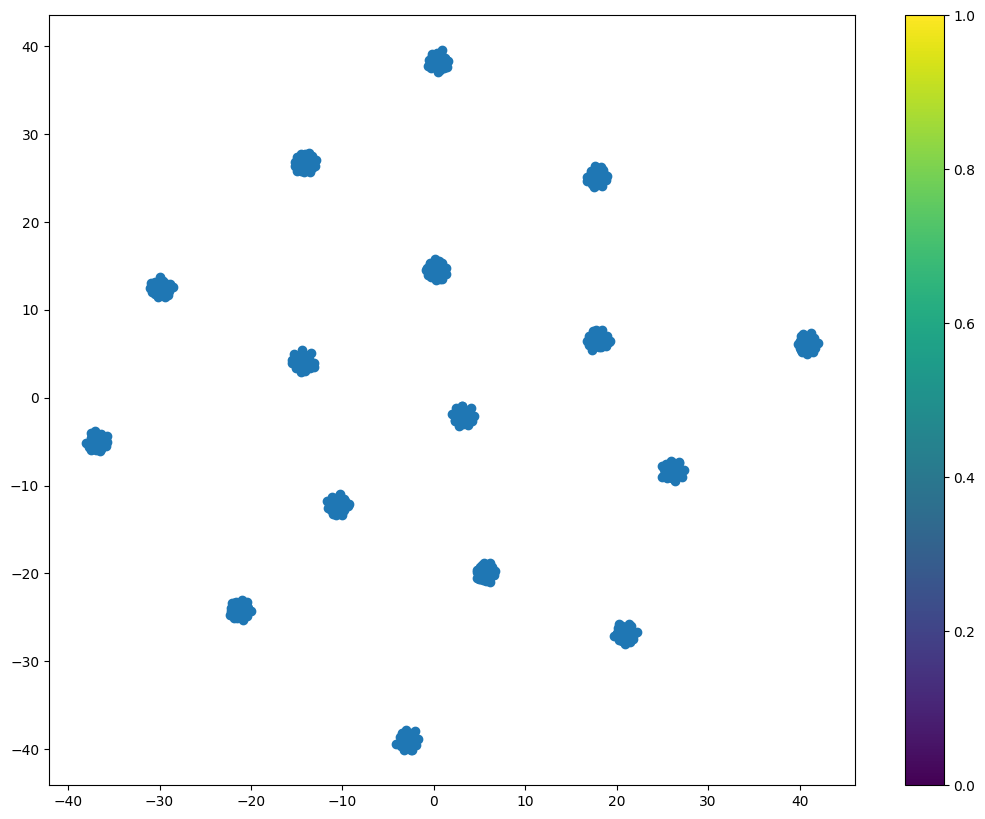

In [81]:
# тут ваш код (нарисуйте на плоскости)
plt.figure(figsize=(13,10))
cmap = plt.get_cmap('jet', 10)
plt.scatter(data_2d[:, 0], data_2d[:, 1], cmap=cmap)
plt.colorbar()
plt.show()

In [89]:
pca = PCA(n_components = 2)
data_2d = pca.fit_transform(X)

<ipython-input-90-b62481444361>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_2d[:, 0], data_2d[:, 1], cmap=cmap)


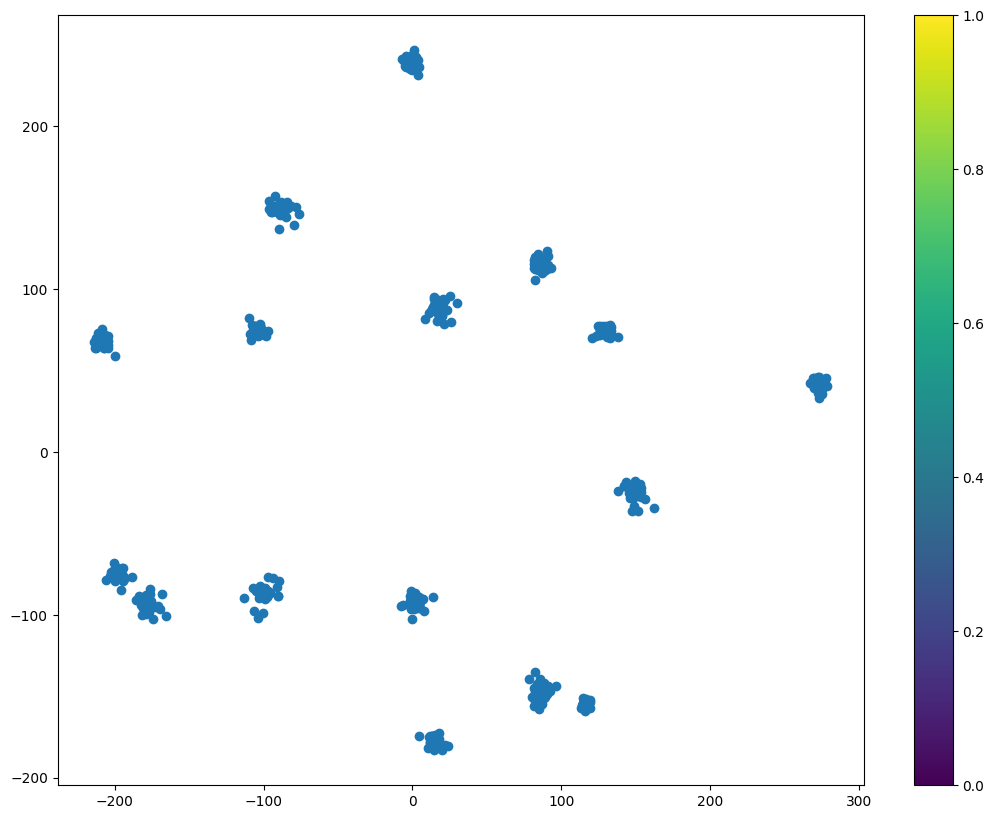

In [90]:
plt.figure(figsize=(13,10))
cmap = plt.get_cmap('jet', 10)
plt.scatter(data_2d[:, 0], data_2d[:, 1], cmap=cmap)
plt.colorbar()
plt.show()